In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


In [3]:
from sklearn.utils import resample
from IPython.display import display
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



In [4]:
pip install xgboost lightgbm catboost


Note: you may need to restart the kernel to use updated packages.


In [5]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv(r"C:\Users\Atefah\Desktop\IRONHACK\Loan_Aproval\loan_data.csv")

In [41]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948,0,35000,16.02,0.49,3,561,0,1,False,False,True,False,False,False,True,False
1,21.0,0,1,12282,0,1000,11.14,0.08,2,504,1,0,False,True,False,True,False,False,False,False
2,25.0,0,1,12438,3,5500,12.87,0.44,3,635,0,1,False,False,False,False,False,True,False,False
3,23.0,0,3,79753,0,35000,15.23,0.44,2,675,0,1,False,False,True,False,False,True,False,False
4,24.0,1,4,66135,1,35000,14.27,0.53,4,586,0,1,False,False,True,False,False,True,False,False


In [8]:
df.shape
df.head(2)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Check for duplicated rows
duplicated_rows = df.duplicated().sum()
print(f"\nNumber of duplicated rows: {duplicated_rows}")

Missing values per column:
 person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Number of duplicated rows: 0


In [10]:
# Check unique values for each column in the dataframe
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col}: {len(unique_vals)} unique values")
    if len(unique_vals) < 20:
        print(f"Values: {unique_vals}\n")

person_age: 60 unique values
person_gender: 2 unique values
Values: ['female' 'male']

person_education: 5 unique values
Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

person_income: 33989 unique values
person_emp_exp: 63 unique values
person_home_ownership: 4 unique values
Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

loan_amnt: 4483 unique values
loan_intent: 6 unique values
Values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

loan_int_rate: 1302 unique values
loan_percent_income: 64 unique values
cb_person_cred_hist_length: 29 unique values
credit_score: 340 unique values
previous_loan_defaults_on_file: 2 unique values
Values: ['No' 'Yes']

loan_status: 2 unique values
Values: [1 0]



In [11]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


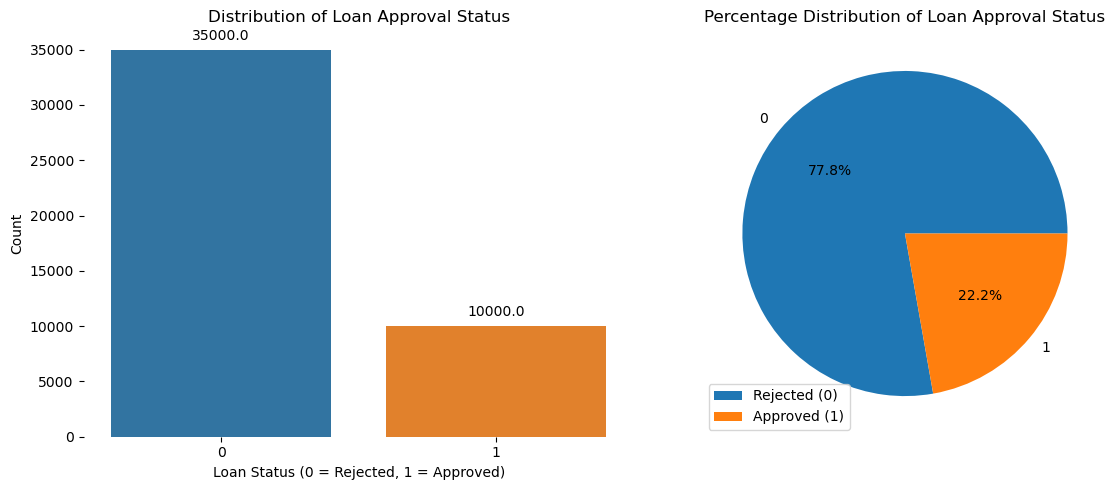

In [12]:
# Create subplots for loan status visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Count the occurrences of each loan status
loan_status_counts = df['loan_status'].value_counts()

# Bar plot for loan status distribution
sns.barplot(x=loan_status_counts.index, y=loan_status_counts, ax=axes[0], palette='tab10')
axes[0].set_title('Distribution of Loan Approval Status')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Loan Status (0 = Rejected, 1 = Approved)')

# Annotate bar plot with counts
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', 
                     xytext=(0, 10), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Pie chart for percentage distribution of loan status
loan_status_percentage = loan_status_counts / loan_status_counts.sum() * 100
axes[1].pie(loan_status_percentage, labels=loan_status_percentage.index, autopct='%1.1f%%', 
            colors=sns.color_palette('tab10'))
axes[1].set_title('Percentage Distribution of Loan Approval Status')
plt.legend(['Rejected (0)', 'Approved (1)'])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [15]:
def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, palette='muted')  
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

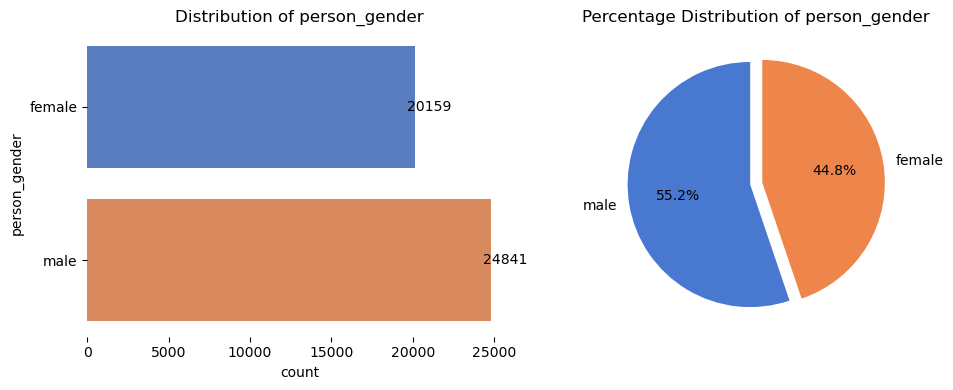

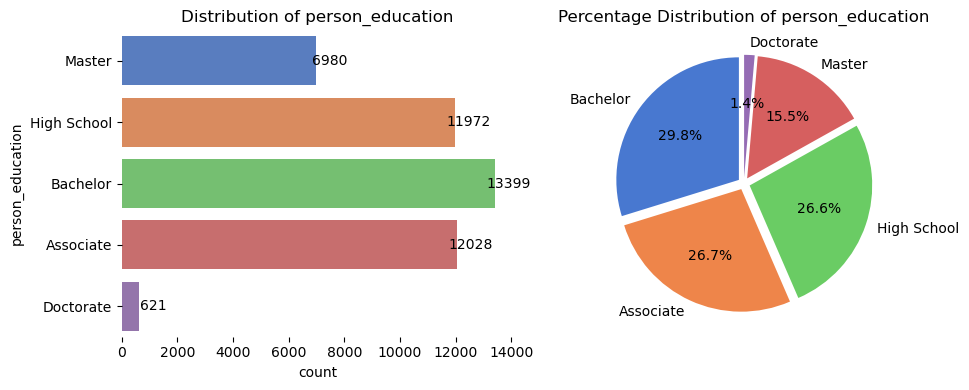

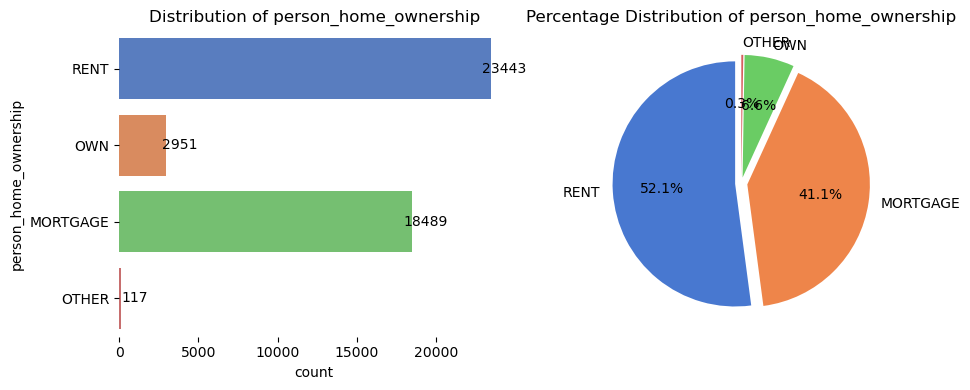

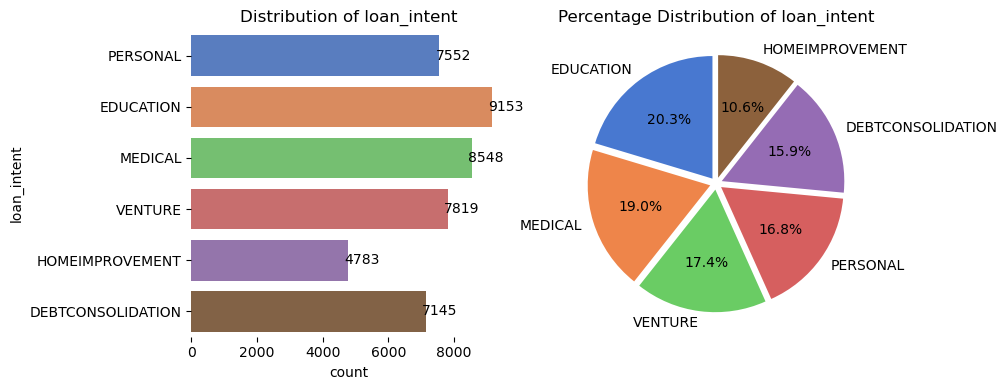

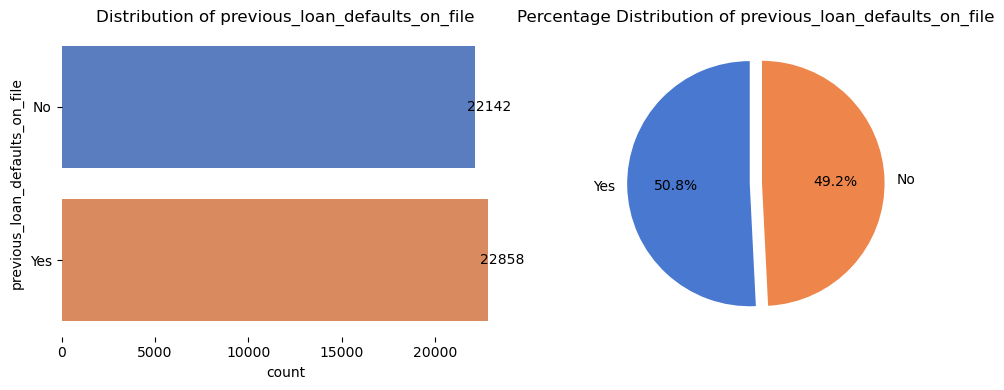

In [16]:
plot_categorical_distribution('person_gender')
plot_categorical_distribution('person_education')
plot_categorical_distribution('person_home_ownership')
plot_categorical_distribution('loan_intent')
plot_categorical_distribution('previous_loan_defaults_on_file')

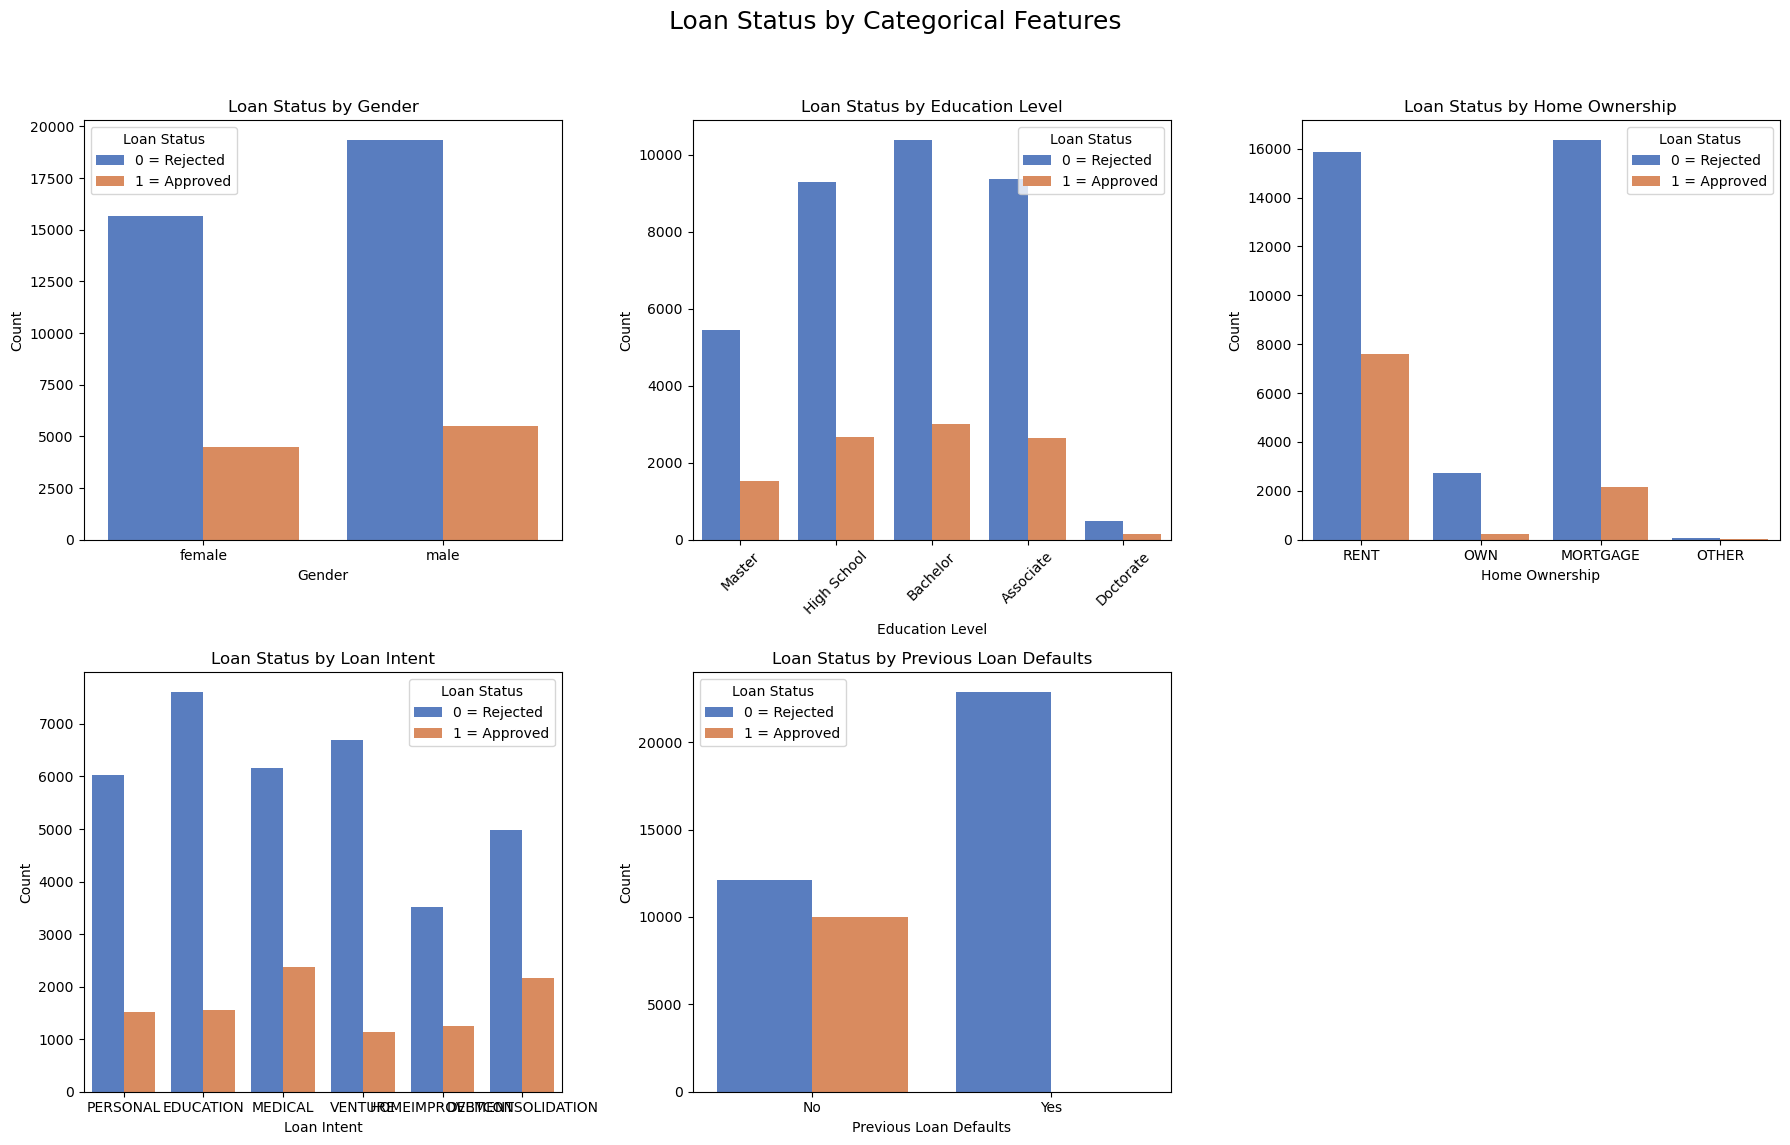

In [17]:
# Create subplots for loan status by categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Loan Status by Categorical Features", fontsize=18)

# Visualization for person_gender vs loan_status
sns.countplot(data=df, x='person_gender', hue='loan_status', ax=axes[0, 0], palette='muted')
axes[0, 0].set_title("Loan Status by Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for person_education vs loan_status
sns.countplot(data=df, x='person_education', hue='loan_status', ax=axes[0, 1], palette='muted')
axes[0, 1].set_title("Loan Status by Education Level")
axes[0, 1].set_xlabel("Education Level")
axes[0, 1].set_ylabel("Count")
axes[0, 1].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])
axes[0, 1].tick_params(axis='x', rotation=45)

# Visualization for person_home_ownership vs loan_status
sns.countplot(data=df, x='person_home_ownership', hue='loan_status', ax=axes[0, 2], palette='muted')
axes[0, 2].set_title("Loan Status by Home Ownership")
axes[0, 2].set_xlabel("Home Ownership")
axes[0, 2].set_ylabel("Count")
axes[0, 2].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for loan_intent vs loan_status
sns.countplot(data=df, x='loan_intent', hue='loan_status', ax=axes[1, 0], palette='muted')
axes[1, 0].set_title("Loan Status by Loan Intent")
axes[1, 0].set_xlabel("Loan Intent")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for previous_loan_defaults_on_file vs loan_status
sns.countplot(data=df, x='previous_loan_defaults_on_file', hue='loan_status', ax=axes[1, 1], palette='muted')
axes[1, 1].set_title("Loan Status by Previous Loan Defaults")
axes[1, 1].set_xlabel("Previous Loan Defaults")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Hide the last subplot (if not needed)
fig.delaxes(axes[1][2])

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

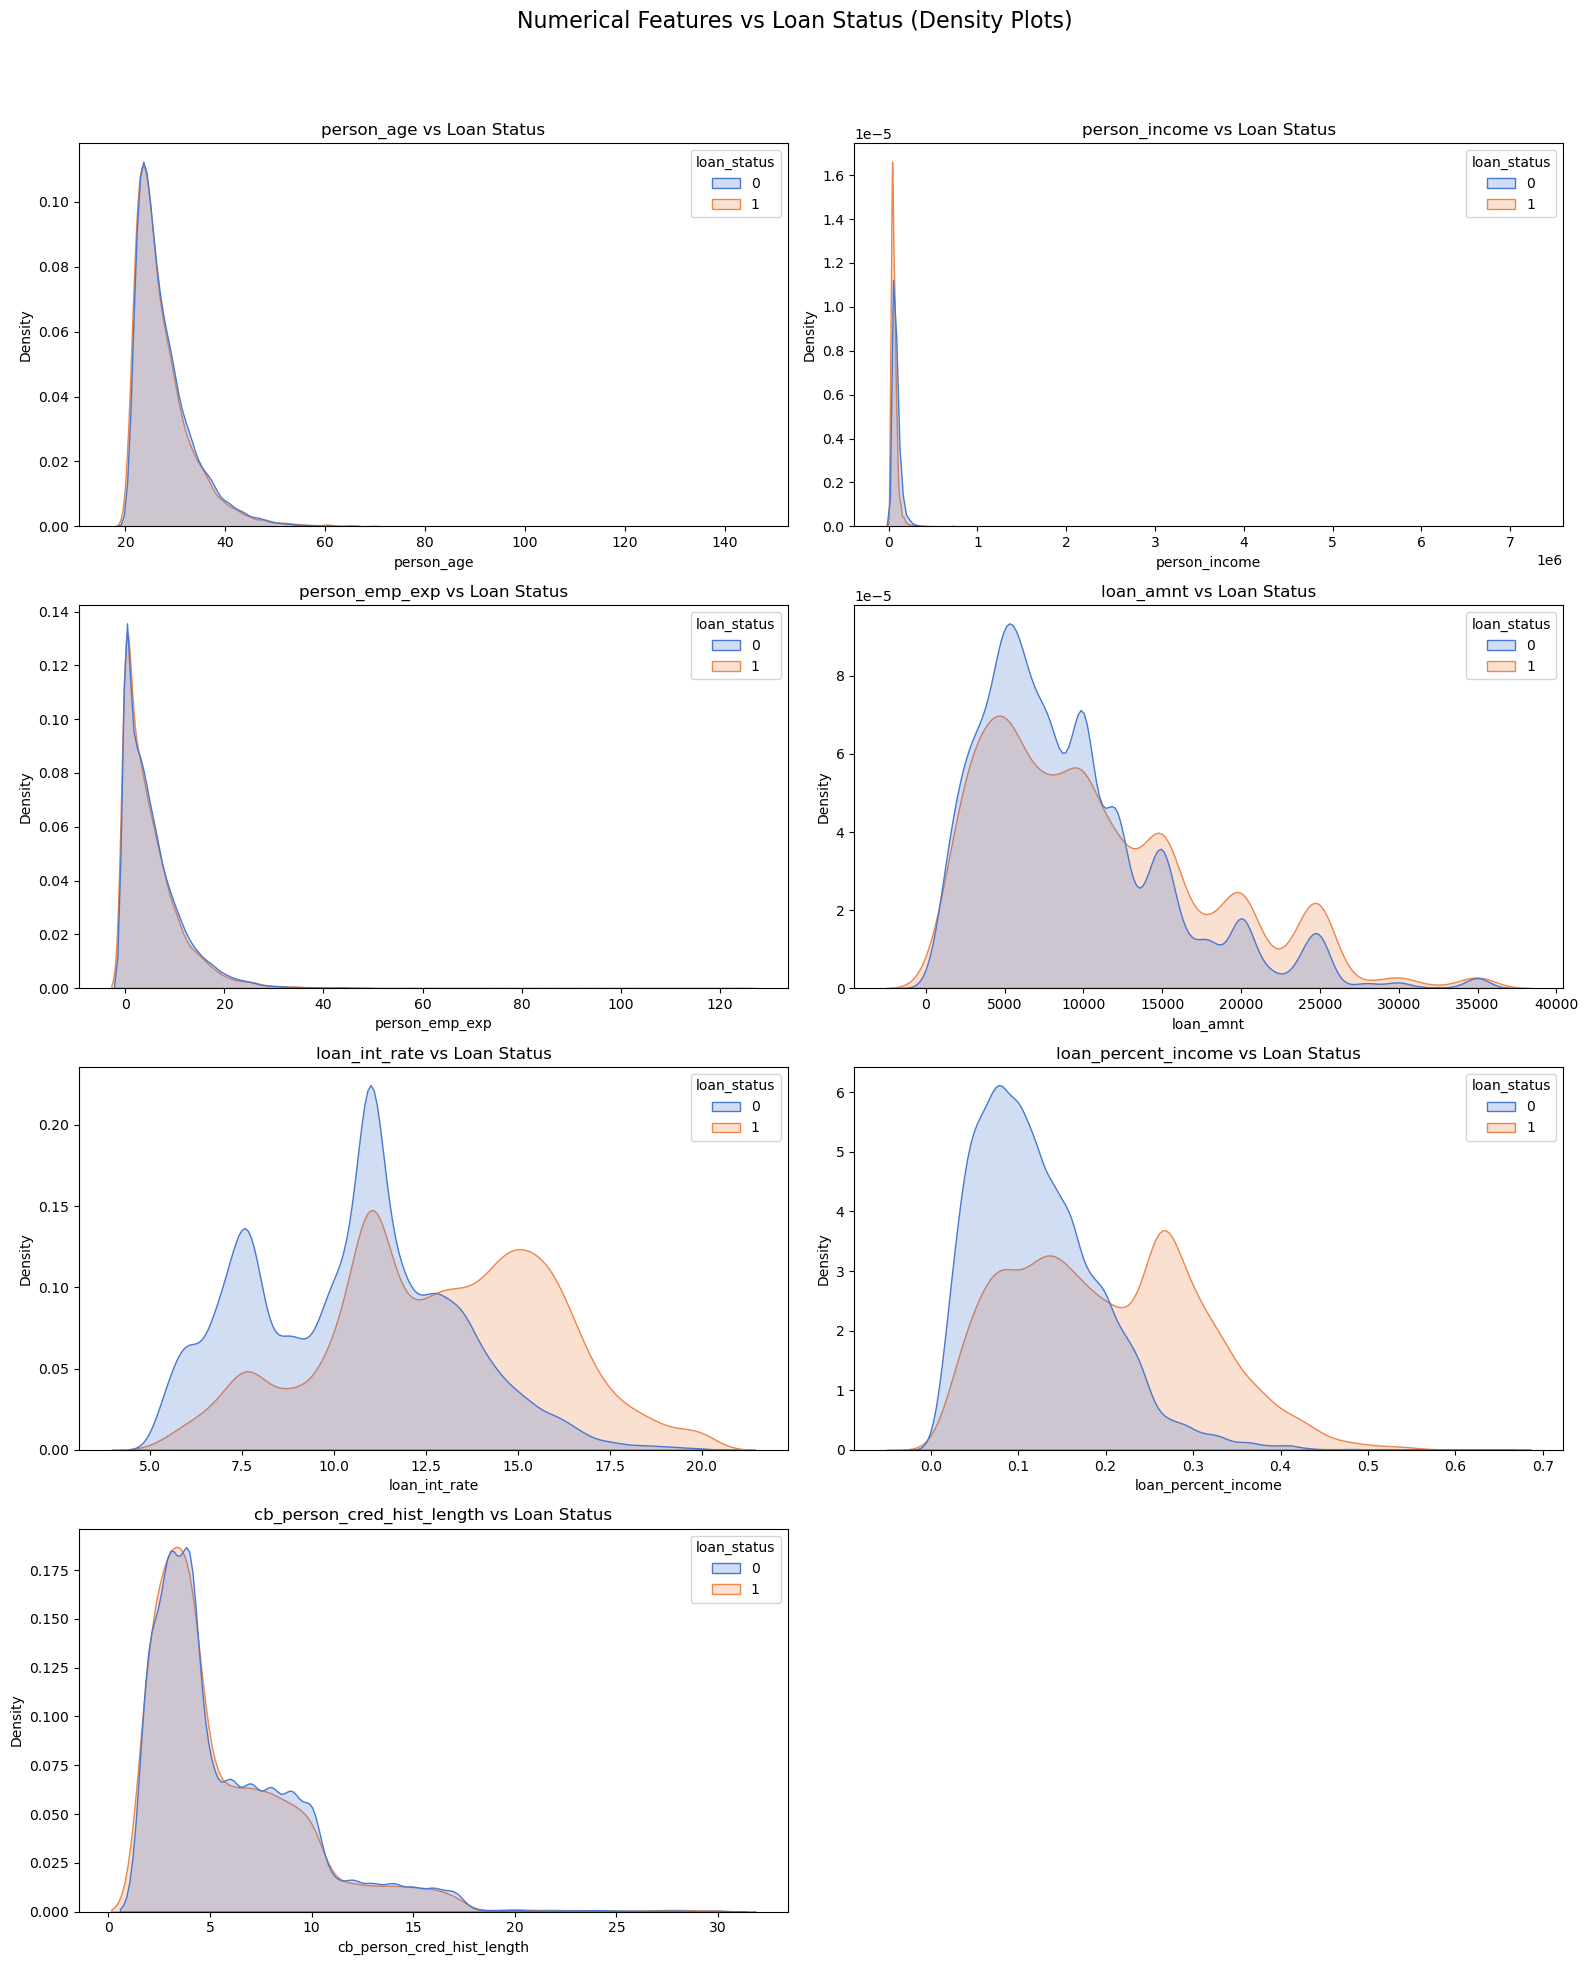

In [18]:
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Numerical Features vs Loan Status (Density Plots)', fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=col, hue='loan_status', ax=axes[i//2, i%2], fill=True, common_norm=False, palette='muted')
    axes[i//2, i%2].set_title(f'{col} vs Loan Status')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Density')

fig.delaxes(axes[3, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

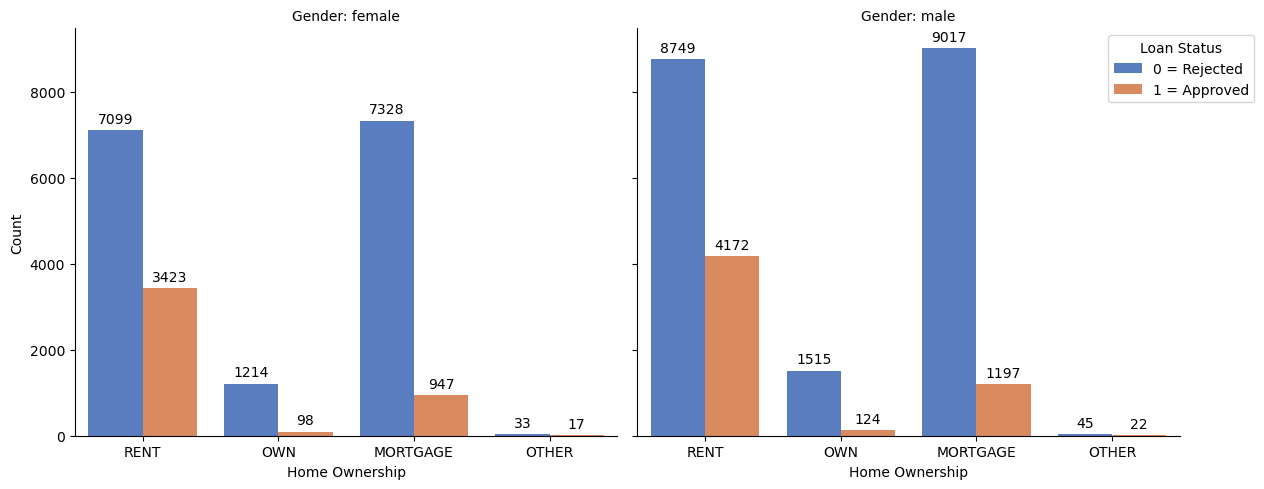

In [20]:
# Create the catplot for person_home_ownership vs loan_status by person_gender
g = sns.catplot(
    data=df,
    x='person_home_ownership', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Home Ownership", "Count")
g.set_titles("Gender: {col_name}")

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

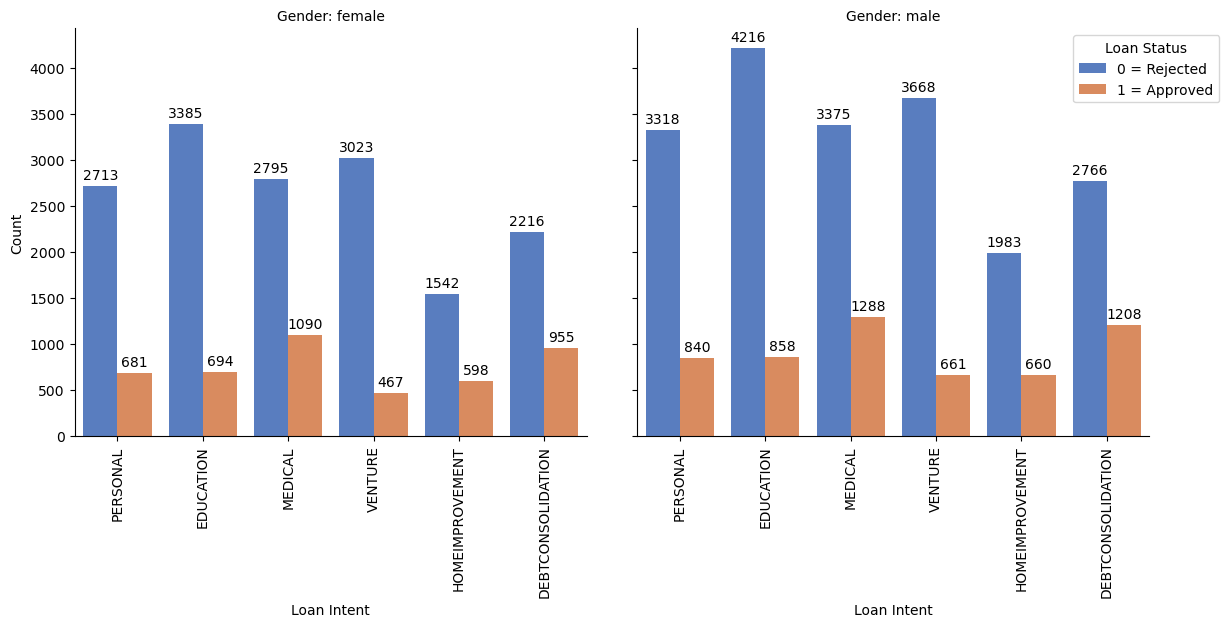

In [21]:
# Create the catplot for loan_intent vs loan_status by person_gender
g = sns.catplot(
    data=df,
    x='loan_intent', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Loan Intent", "Count")
g.set_titles("Gender: {col_name}")

# Rotate x-axis labels by 90 degrees
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()


DATA PROCESSING 

In [22]:
# Binary Encoding for person_gender
df['person_gender'] = df['person_gender'].map({'female': 0, 'male': 1})
# Binary Encoding for previous_loan_defaults_on_file
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

# Ordinal Encoding for person_education (if applicable)
education_order = {'High School': 1, 'Associate': 2, 'Bachelor': 3, 
                   'Master': 4, 'Doctorate': 5}
df['person_education'] = df['person_education'].map(education_order)

# One-Hot Encoding for person_home_ownership and loan_intent
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)


# Display the transformed DataFrame
print(df.head())

   person_age  person_gender  person_education  person_income  person_emp_exp  \
0          22              0                 4          71948               0   
1          21              0                 1          12282               0   
2          25              0                 1          12438               3   
3          23              0                 3          79753               0   
4          24              1                 4          66135               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0      35000          16.02                 0.49                           3   
1       1000          11.14                 0.08                           2   
2       5500          12.87                 0.44                           3   
3      35000          15.23                 0.44                           2   
4      35000          14.27                 0.53                           4   

   credit_score  previous_loan_d

The transformation applied to the dataset:

Binary Encoding:

person_gender is now represented as 0 (female) and 1 (male).
previous_loan_defaults_on_file is represented as 0 (No) and 1 (Yes).
Ordinal Encoding:

person_education has been mapped based on the level of education, with higher values indicating higher educational attainment (e.g., High School = 1, Doctorate = 5).
One-Hot Encoding:

New columns have been created for person_home_ownership and loan_intent, each representing a unique category (e.g., person_home_ownership_OWN, loan_intent_PERSONAL), with one category dropped to avoid multicollsformations.

In [23]:
# Replacing Outliers with Median
median_age = df['person_age'].median()
df['person_age'] = df['person_age'].apply(lambda x: median_age if x > 100 else x)

In [24]:
# Analyze the 'person_age' column
column = 'person_age'
title = column.replace('_', ' ')

# Display summary statistics for person_age
print(f'\nSummary Statistics for {title}:\n', df[column].describe())


Summary Statistics for person age:
 count    45000.000000
mean        27.748156
std          5.909318
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64


After replacing outliers with the median age:

The maximum age is now 94, which falls within a reasonable range for human age data.
The mean age (27.75) and standard deviation (5.91) have slightly decreased, suggesting a more compact age distribution.
Replacing extreme values with the median has helped to eliminate unrealistic values without removing any rows, preserving the dataset's integrity.
This approach retains a realistic spread in the person_age data, with the median remaining at 26.

CORELATION HEATMAP 

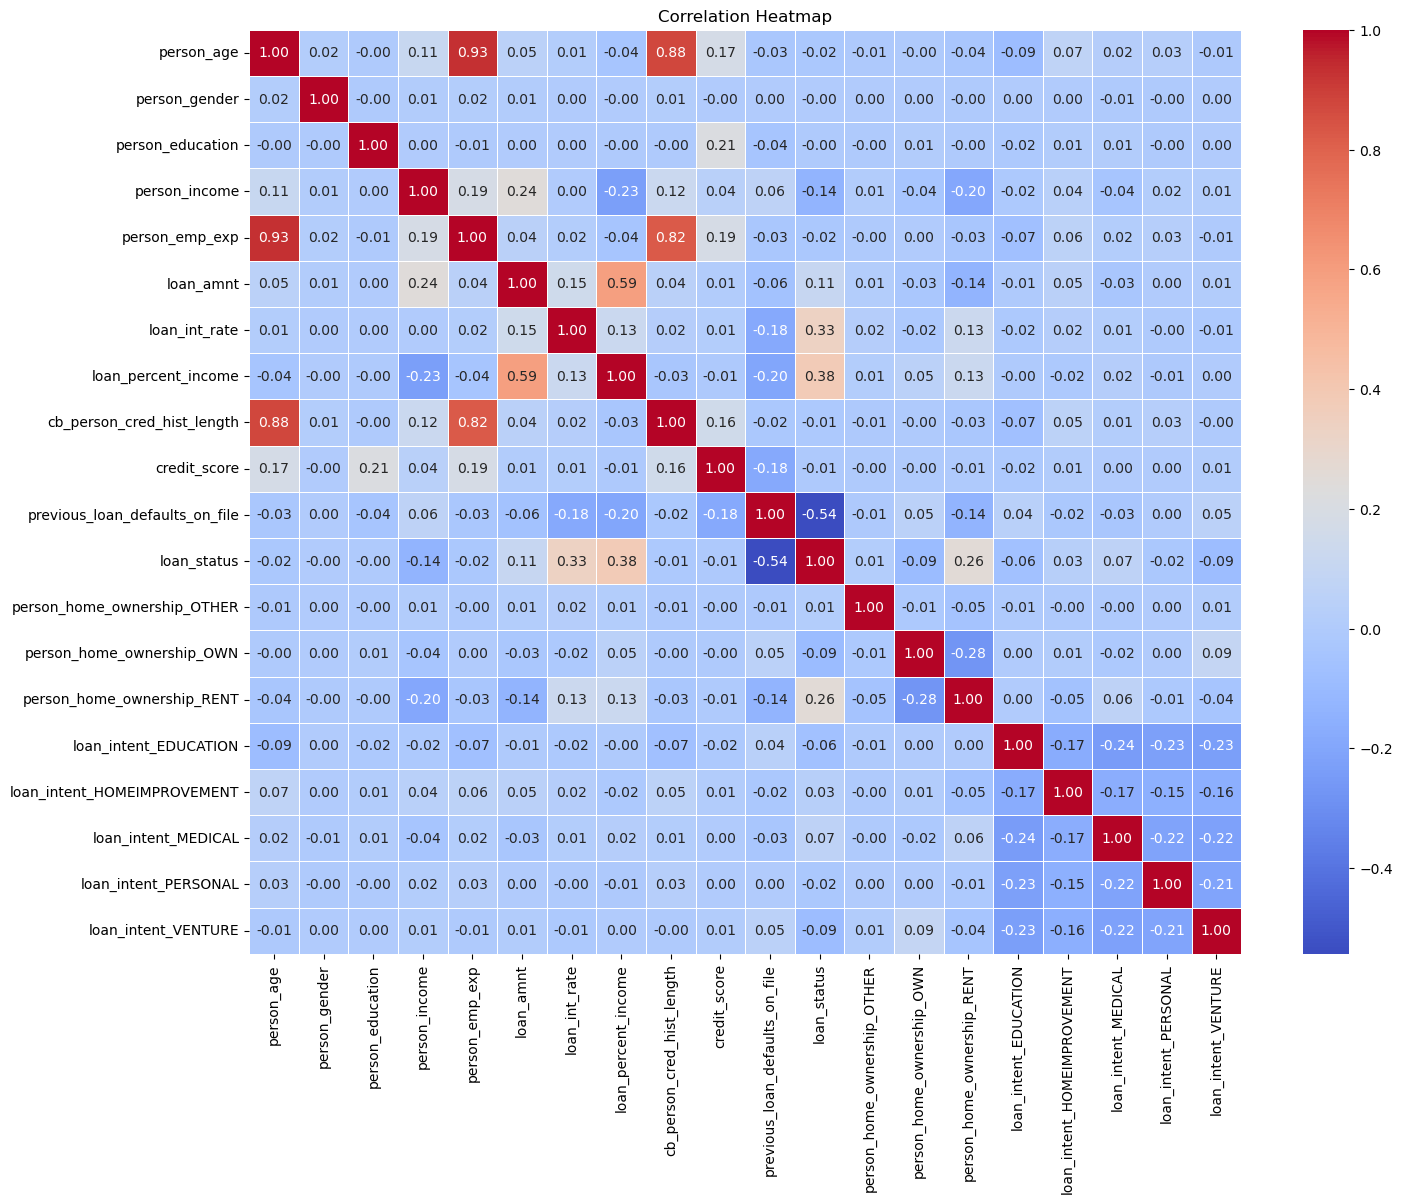

In [25]:
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


MODEL TRAINING AND EVALUATION 

In [26]:
# Separate features and target from the train dataset
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

# Display the transformed data
display(X.head())
display(y.head())

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948,0,35000,16.02,0.49,3,561,0,False,False,True,False,False,False,True,False
1,21.0,0,1,12282,0,1000,11.14,0.08,2,504,1,False,True,False,True,False,False,False,False
2,25.0,0,1,12438,3,5500,12.87,0.44,3,635,0,False,False,False,False,False,True,False,False
3,23.0,0,3,79753,0,35000,15.23,0.44,2,675,0,False,False,True,False,False,True,False,False
4,24.0,1,4,66135,1,35000,14.27,0.53,4,586,0,False,False,True,False,False,True,False,False


0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [27]:
# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Use RobustScaler 
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [29]:
# Dictionary to store the models and their names
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(verbosity=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)}

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.77      0.74      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.85      9000
weighted avg       0.89      0.89      0.89      9000



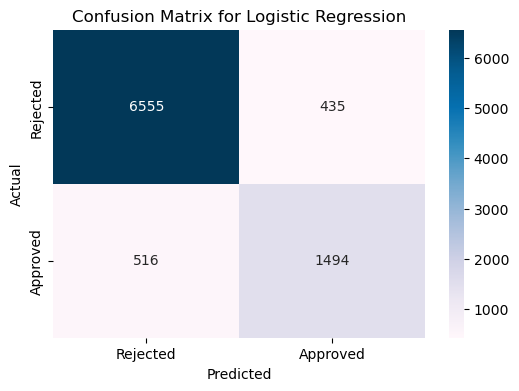



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6990
           1       0.90      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



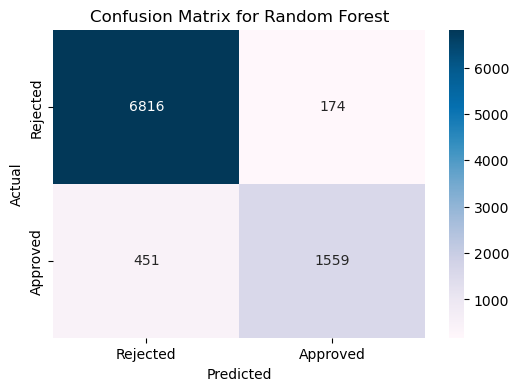



Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



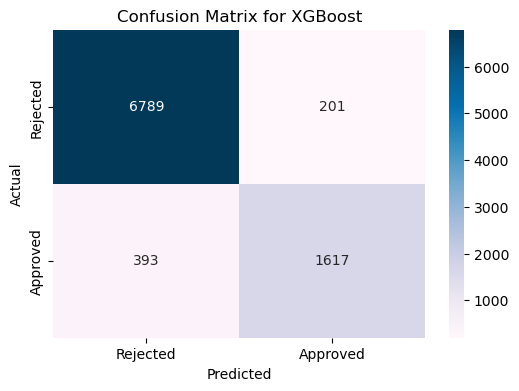



Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.79      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



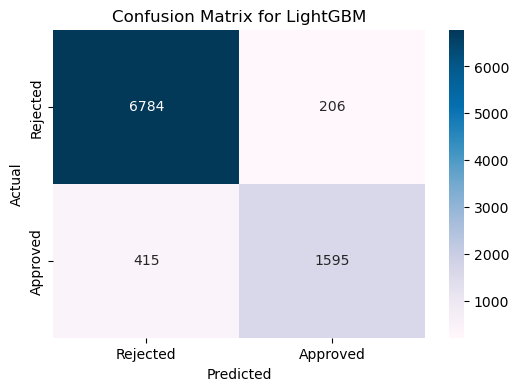



Classification Report for CatBoost:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



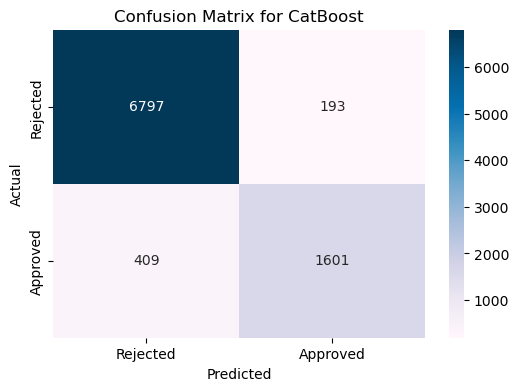



Model Performance Table:


,Model,Train Score,Test Score,Accuracy Score
0,Logistic Regression,0.897472,0.894333,0.894333
1,Random Forest,1.000000,0.930556,0.930556
2,XGBoost,0.967861,0.934000,0.934000
3,LightGBM,0.947639,0.931000,0.931000
4,CatBoost,0.954306,0.933111,0.933111


In [30]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions on validation set
    y_val_pred = model.predict(X_val)
    
    # Train and Test Scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_val, y_val)
    
    # Accuracy Score
    accuracy = accuracy_score(y_val, y_val_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })

     # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_val, y_val_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)

In [43]:
# Sort by Accuracy Score in ascending order and display
model_accuracy_df_sorted = model_accuracy_df.sort_values(by='Accuracy Score', ascending=True)
display(model_accuracy_df_sorted)

,Model,Accuracy Score
0,Logistic Regression,0.894333
1,Random Forest,0.930556
3,LightGBM,0.931000
4,CatBoost,0.933111
2,XGBoost,0.934000


Key Observations:¶
Logistic Regression: Moderate performance, likely due to its linear nature, which may not fully capture the complex relationships in the data.
Random Forest, XGBoost, LightGBM, and CatBoost: These models performed strongly, achieving high accuracy scores (around 0.93). Ensemble models (Random Forest, XGBoost, LightGBM, CatBoost) generally perform well on structured data, benefiting from the ability to capture non-linear relationships.
Best Model: XGBoost achieved the highest accuracy of 0.9346, making it the preferred choice for this task.

In [31]:
# Identify the best model by accuracy
best_model_row = results_df.loc[results_df['Accuracy Score'].idxmax()]
best_model_name = best_model_row['Model']
best_model_accuracy = best_model_row['Accuracy Score']

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")


Best Model: XGBoost with Accuracy: 0.9340


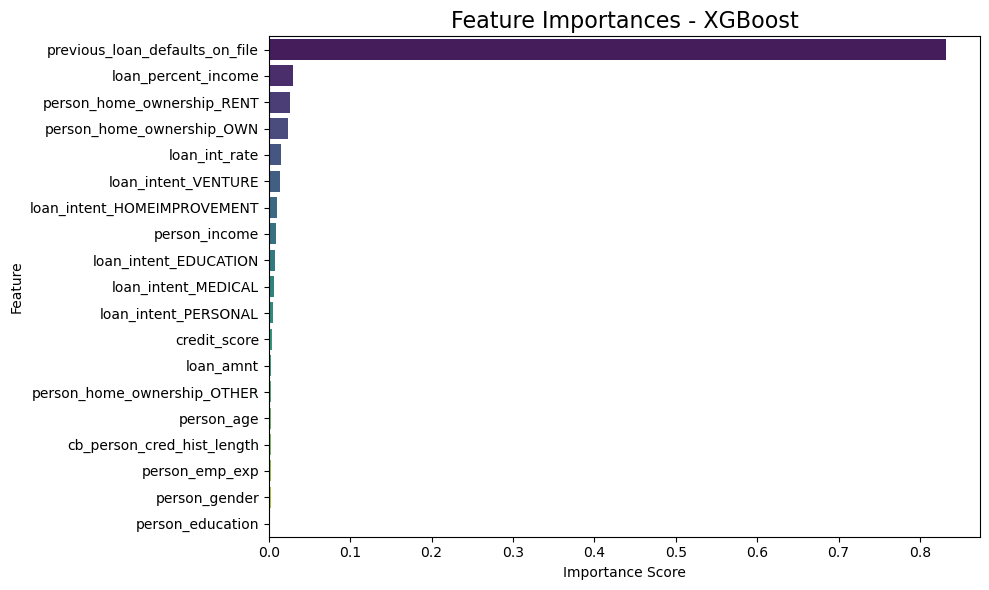

In [32]:
# Check if the best model supports feature importances
best_model = models[best_model_name]

if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title(f'Feature Importances - {best_model_name}', fontsize=16)
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print(f"The {best_model_name} model does not support feature importances.")

Feature Importance Analysis¶
For XGBoost (the best model), feature importances were derived, providing insights into which features were most influential in predicting loan approval.
Key Features: Likely features with high importance scores include loan_percent_income, and previous_loan_defaults_on_file, as these factors are closely related to an applicant's creditworthiness and loan risk.

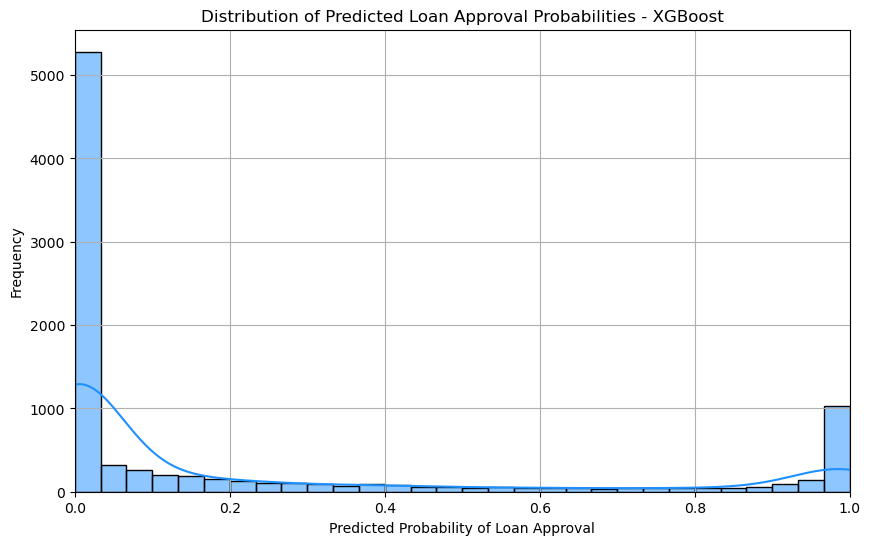

In [33]:
# Obtain predicted probabilities for the validation set
test_probabilities = best_model.predict_proba(X_val)[:, 1]  

# Plot distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(test_probabilities, bins=30, kde=True, color='dodgerblue')
plt.title(f'Distribution of Predicted Loan Approval Probabilities - {best_model_name}')
plt.xlabel('Predicted Probability of Loan Approval')
plt.ylabel('Frequency')
plt.xlim(0, 1) 
plt.grid()
plt.show()

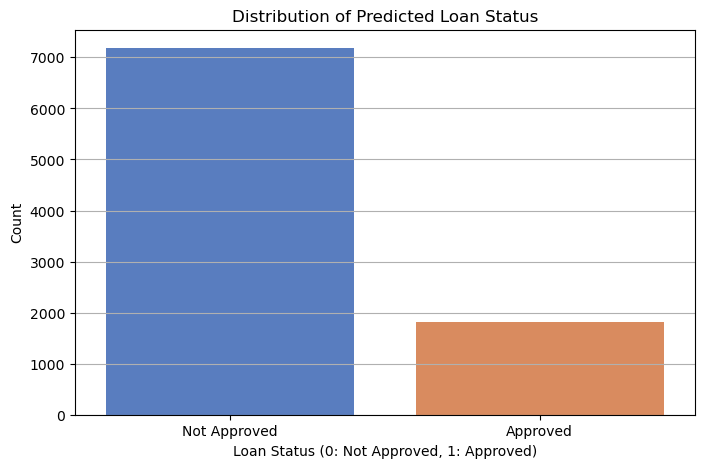

In [34]:
binary_predictions = (test_probabilities > 0.5).astype(int)

# Plot distribution of binary predictions
plt.figure(figsize=(8, 5))
sns.countplot(x=binary_predictions.flatten(), palette='muted')
plt.title('Distribution of Predicted Loan Status')
plt.xlabel('Loan Status (0: Not Approved, 1: Approved)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Approved', 'Approved'])
plt.grid(axis='y')
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define parameter grid for XGBoost (best model)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Display best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best estimator on validation set
best_xgb = grid_search.best_estimator_
val_accuracy = best_xgb.score(X_val, y_val)
print("Validation Accuracy with Best Estimator:", val_accuracy)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9338888888888889
Validation Accuracy with Best Estimator: 0.9353333333333333


In [39]:

# Save the predicted data as a new DataFrame
dfpredicated = X_val.copy()
dfpredicated = pd.DataFrame(dfpredicated, columns=X.columns)
dfpredicated['predicted_loan_status'] = binary_predictions

# Display the first few rows
display(dfpredicated.head())


,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,predicted_loan_status
0,1.000000,0.0,0.0,0.613528,0.857143,-0.068966,-1.116854,-0.333333,1.2,-0.573529,-1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0
1,-0.333333,0.0,0.0,-0.211303,0.285714,0.137931,0.107865,0.333333,0.0,0.102941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,-0.666667,-1.0,1.0,-0.613961,-0.571429,-0.413793,0.869663,0.083333,0.0,1.044118,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,-0.500000,-1.0,0.5,-0.559435,-0.428571,-0.413793,0.669663,0.083333,-0.2,-0.632353,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0
4,2.666667,0.0,-0.5,0.018175,2.285714,0.275862,0.988764,0.250000,1.4,-0.794118,-1.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,1


In [40]:

dfpredicated.to_csv('predicted_loan_status.csv', index=False)
